**LOGISTIC REGRESSION MODEL**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique, it gives the probabilistic values which lie between 0 and 1.Logistic regression predicts the output of a categorical dependent variable

**Dataset Description**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1.   ID number
2.   Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:


1.   radius (mean of distances from center to points on the perimeter)
2.   texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

**Loading Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

numpy and pandas are imported to work with data arrays and dataframes, respectively.

matplotlib and seaborn are imported for visualization purposes.

train_test_split is imported to split the dataset into training and testing sets for model evaluation.

LogisticRegression is imported to build a logistic regression model for binary classification.

accuracy_score and confusion_matrix are imported to evaluate the performance of the model.

The code is setting up the necessary libraries to build and evaluate a logistic regression model for binary classification.

**Reading the dataset**

Used Breast cancer dataset to predict the number of patients having cancer

In [ ]:
df=pd.read_csv("/content/data.csv")

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Only 'Unnamed: 32' is completely null in the above output, probably an error in the dataset, we drop it.

In [ ]:
#Dropping the columns
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

The above code uses the drop() method in pandas library to remove the 'id' and 'Unnamed: 32' columns from a pandas DataFrame, and modifies the original DataFrame in place by setting the inplace parameter to True.

The drop() method is used to remove one or more columns from a DataFrame.

The axis parameter set to 1, indicating that the columns should be removed. The inplace parameter is set to True to modify the DataFrame object in place.

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The above code is used to display the first n rows of a dataset. By default, the method returns the first 5 rows of the dataset.

This method is useful for quickly inspecting the data in a DataFrame, verifying that the data has been loaded correctly, and getting a sense of the data types and values in the DataFrame

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

This code is useful for quickly checking the unique values in a categorical variable of a pandas dataframe.

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The above code modifies the 'diagnosis' column of a pandas DataFrame by mapping the categorical values 'M' (malignant) and 'B' (benign) to the binary values 1 and 0, respectively. The map() method in pandas library is used to replace values in a column of a DataFrame based on a dictionary or a function.

By mapping the categorical values to binary values, the 'diagnosis' column can now be used as the target variable for binary classification models.

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The above code is used to generate descriptive statistics for a pandas DataFrame. The method computes various statistical measures such as count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column in the DataFrame

In [ ]:
X=df.drop(columns='diagnosis')
y = df.diagnosis

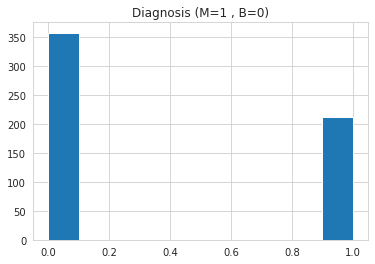

In [ ]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [ ]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

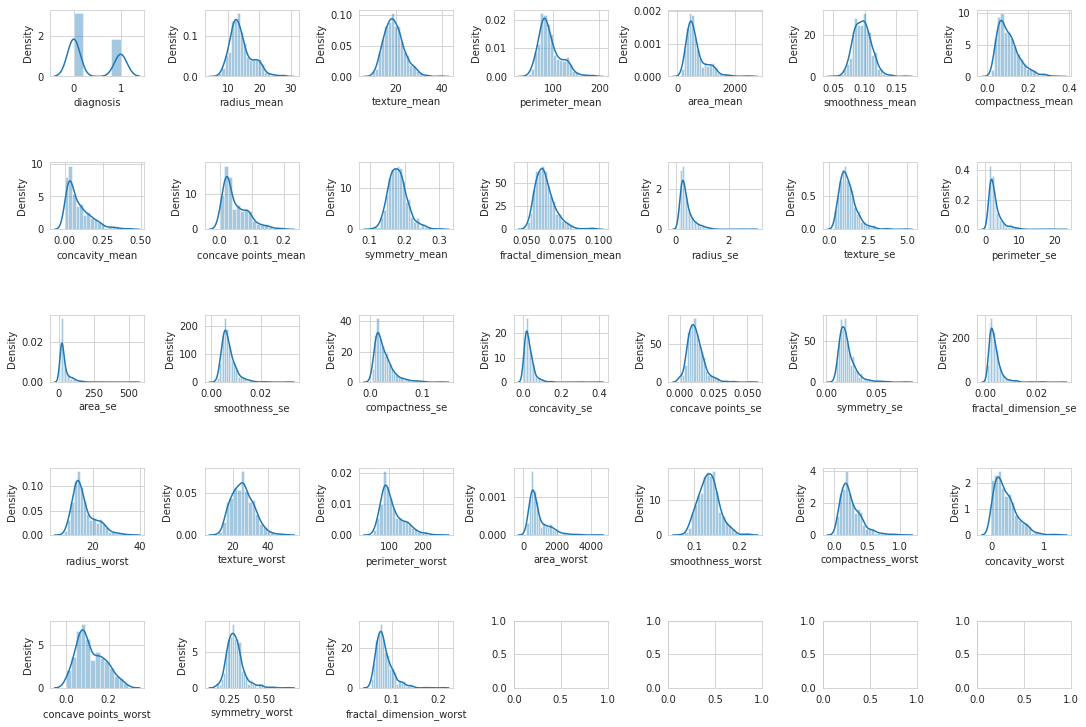

In [ ]:
#pairplot
fig, axs = plt.subplots(ncols=7, nrows=5, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

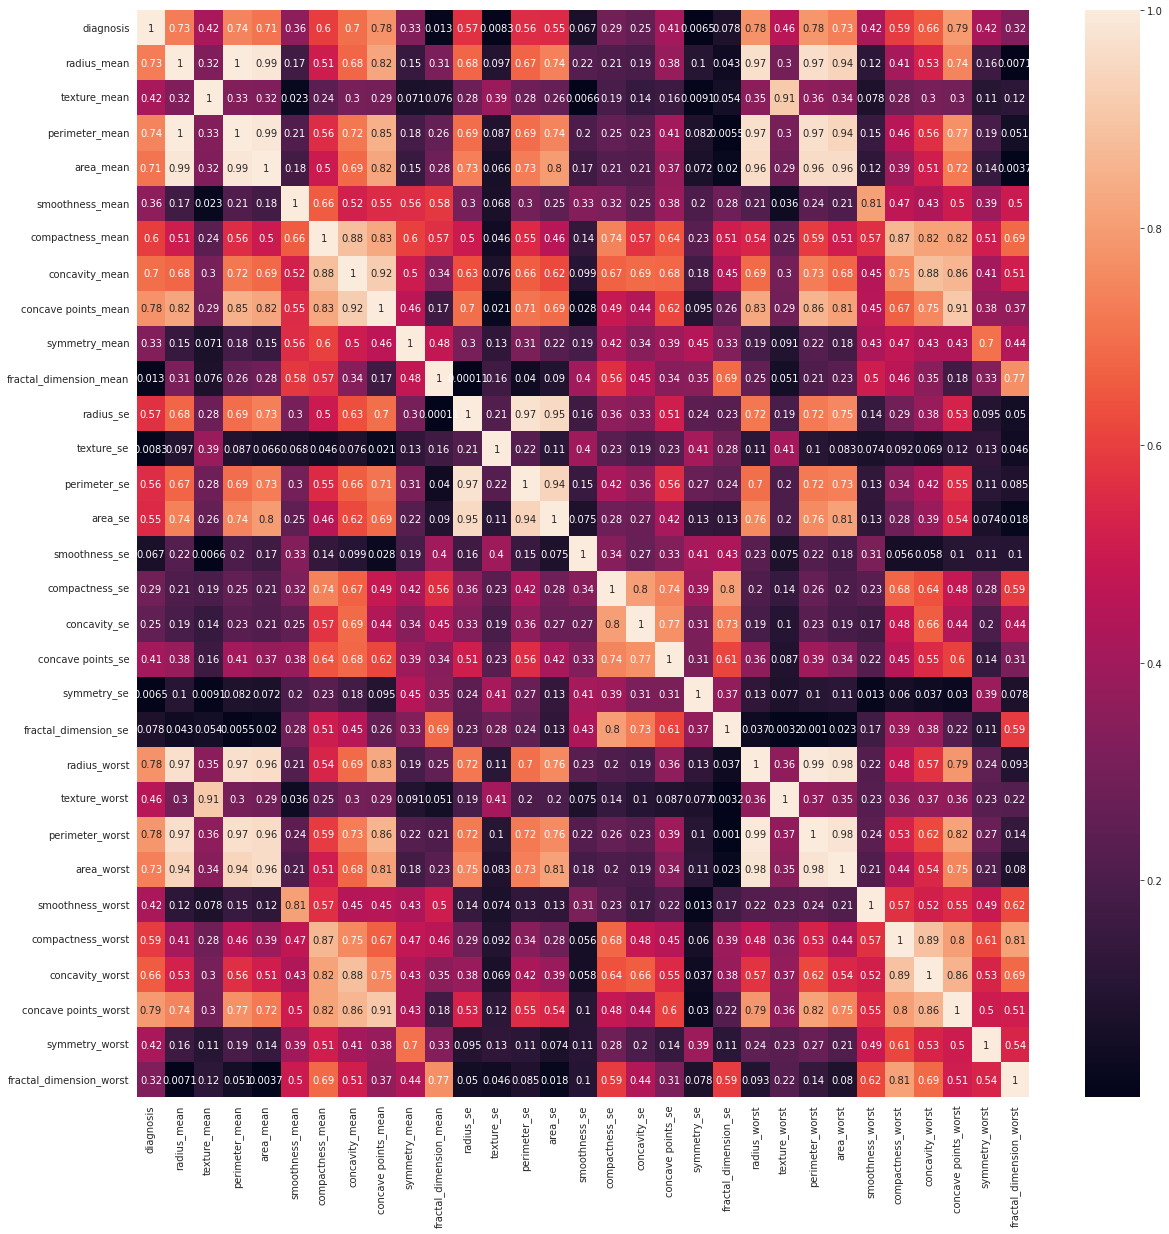

In [ ]:
#heatmap plot
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr().abs(),  annot=True)

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold to drop highly correlated features
threshold = 0.5

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated features from the dataframe
df = df.drop(df[to_drop], axis=1)

# Print the remaining features
print(df.columns)

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'texture_se',
       'smoothness_se', 'symmetry_se'],
      dtype='object')


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

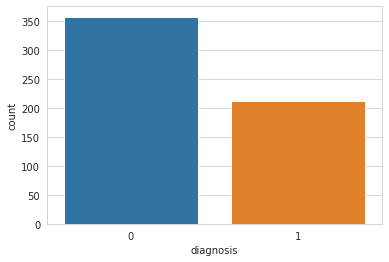

In [ ]:
#Count plot
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

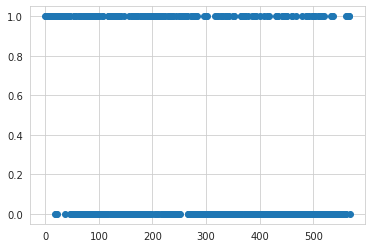

In [ ]:
#Scatter plot
plt.scatter(df.index, df['diagnosis'])
plt.show()

In [ ]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [ ]:
# Creating an instance of LogisticRegression model
model = LogisticRegression(C= 206.913808111479, penalty= 'l1', solver= 'liblinear')

In [ ]:
# Fitting the model on training data
model.fit(X_train, y_train)

LogisticRegression(C=206.913808111479, penalty='l1', solver='liblinear')

In [ ]:
# Predicting target values on testing data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


0.034482758620689655

In [ ]:
# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9655172413793104


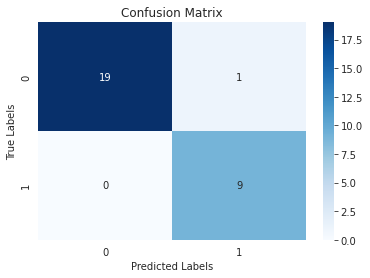

Precision: 0.9
Recall: 1.0
F1 Score: 0.9473684210526316


In [ ]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
# Calculating precision score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculating recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculating f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for grid search
param_grid = {'C': np.logspace(-4, 4, 20),
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'saga']}

# Perform grid search with 5-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy score on test set
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score on test set:", grid_search.score(X_test, y_test))

Best hyperparameters: {'C': 206.913808111479, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy score on test set: 0.9655172413793104
